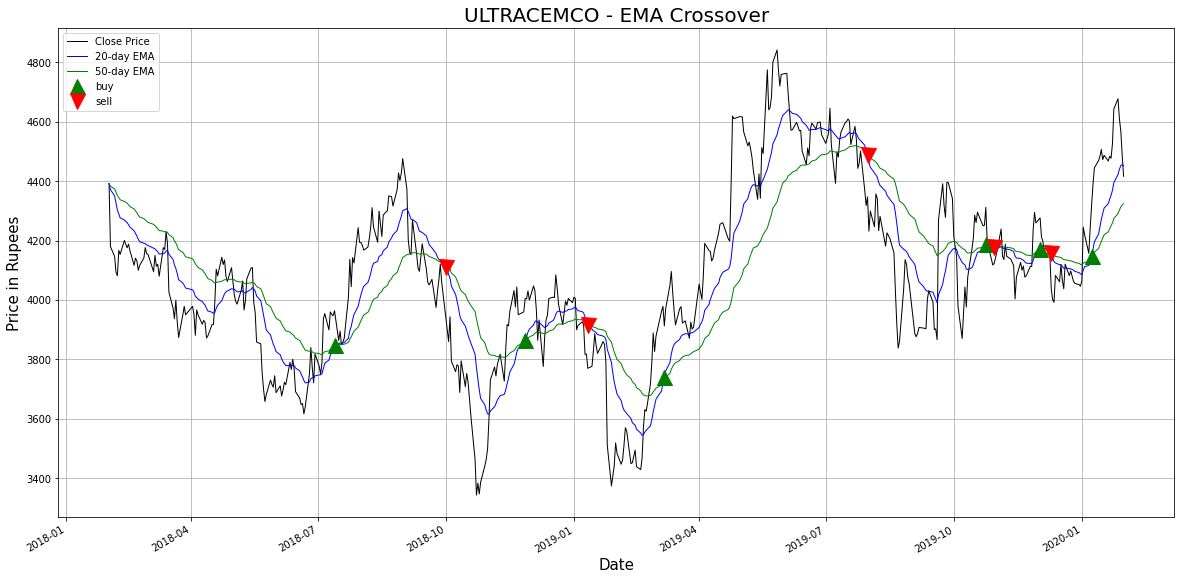

In [8]:
# set start and end dates
start = datetime.datetime(2018, 2, 1)
end = datetime.datetime(2020, 2, 1)
# extract the daily closing price data
ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}
# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_EMA'] > ultratech_df['50_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
ultratech_df['Position'] = ultratech_df['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()